In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

imagesfiles = "att_faces"
facefiles =[]
training_data=[]
for i in range(1,41):
    facefiles.append("s"+str(i))
facefiles

['s1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15',
 's16',
 's17',
 's18',
 's19',
 's20',
 's21',
 's22',
 's23',
 's24',
 's25',
 's26',
 's27',
 's28',
 's29',
 's30',
 's31',
 's32',
 's33',
 's34',
 's35',
 's36',
 's37',
 's38',
 's39',
 's40']

In [34]:
from PIL import Image
def loading_images(folder):
    images = []
    for filename in os.listdir(folder):
        pic = Image.open(os.path.join(folder,filename))
        pic = np.array(pic.convert('L')) #converting to Grayscale
        pic = pic / 255  #making 0-255 range to 0-1 range for computational aid
        print(pic.shape)
        print(pic)
        if pic is not None:
            images.append(pic)
    return images

## Data Loading and Preprocessing

In [35]:
data=[]
for i in range(1,41):
    for j in loading_images(os.path.join(imagesfiles,"s"+str(i))):
        data.append(list((j,i)))

(112, 92)
[[0.18823529 0.19215686 0.17647059 ... 0.21960784 0.21960784 0.21176471]
 [0.17647059 0.20392157 0.15294118 ... 0.20392157 0.19607843 0.2       ]
 [0.17647059 0.19607843 0.16470588 ... 0.18823529 0.20784314 0.19607843]
 ...
 [0.19607843 0.18823529 0.19607843 ... 0.17647059 0.18039216 0.18039216]
 [0.17647059 0.21176471 0.19215686 ... 0.18039216 0.18431373 0.18431373]
 [0.2        0.2        0.2        ... 0.18431373 0.18039216 0.18039216]]
(112, 92)
[[0.13333333 0.13333333 0.12941176 ... 0.00392157 0.00392157 0.00392157]
 [0.1372549  0.11764706 0.1254902  ... 0.14901961 0.18431373 0.15294118]
 [0.13333333 0.10980392 0.12156863 ... 0.21568627 0.23137255 0.19215686]
 ...
 [0.11764706 0.11372549 0.12156863 ... 0.1372549  0.14509804 0.16078431]
 [0.12156863 0.11372549 0.1254902  ... 0.16470588 0.13333333 0.15294118]
 [0.10980392 0.12941176 0.10588235 ... 0.14509804 0.15686275 0.12941176]]
(112, 92)
[[0.23529412 0.23529412 0.24313725 ... 0.15686275 0.20784314 0.18039216]
 [0.22745

 [0.08627451 0.10196078 0.09411765 ... 0.0627451  0.0745098  0.06666667]]
(112, 92)
[[0.52156863 0.52941176 0.52941176 ... 0.52156863 0.51372549 0.51764706]
 [0.52156863 0.52156863 0.5254902  ... 0.51372549 0.50588235 0.50980392]
 [0.50980392 0.5254902  0.51764706 ... 0.50588235 0.51372549 0.50588235]
 ...
 [0.10196078 0.07843137 0.1254902  ... 0.0745098  0.08627451 0.0627451 ]
 [0.09803922 0.08235294 0.10980392 ... 0.07058824 0.07058824 0.0627451 ]
 [0.09019608 0.09803922 0.10588235 ... 0.07058824 0.06666667 0.05882353]]
(112, 92)
[[0.5254902  0.54117647 0.53333333 ... 0.50588235 0.51372549 0.49803922]
 [0.5254902  0.52941176 0.52941176 ... 0.50980392 0.50980392 0.50588235]
 [0.52156863 0.5254902  0.52941176 ... 0.49803922 0.51764706 0.52156863]
 ...
 [0.09803922 0.0745098  0.08235294 ... 0.10588235 0.22352941 0.31764706]
 [0.10196078 0.08627451 0.0745098  ... 0.11764706 0.27843137 0.31764706]
 [0.08235294 0.09803922 0.08627451 ... 0.21568627 0.30980392 0.31764706]]
(112, 92)
[[0.5294

(112, 92)
[[0.41176471 0.40784314 0.4        ... 0.39215686 0.4        0.39215686]
 [0.40784314 0.4        0.41176471 ... 0.39607843 0.40392157 0.39607843]
 [0.39607843 0.41568627 0.4        ... 0.39607843 0.4        0.4       ]
 ...
 [0.63529412 0.63137255 0.6745098  ... 0.65490196 0.59607843 0.55686275]
 [0.62352941 0.6627451  0.64313725 ... 0.67058824 0.60784314 0.54117647]
 [0.61568627 0.69411765 0.65098039 ... 0.67843137 0.63137255 0.47843137]]
(112, 92)
[[0.38823529 0.35294118 0.38039216 ... 0.34509804 0.36862745 0.34509804]
 [0.38823529 0.36862745 0.37647059 ... 0.36862745 0.34117647 0.34901961]
 [0.37254902 0.38039216 0.38039216 ... 0.34901961 0.34901961 0.35686275]
 ...
 [0.32941176 0.38039216 0.38039216 ... 0.45098039 0.50980392 0.58823529]
 [0.47843137 0.60392157 0.6        ... 0.48235294 0.45882353 0.61176471]
 [0.64705882 0.69019608 0.64313725 ... 0.52941176 0.44313725 0.61960784]]
(112, 92)
[[0.37254902 0.37254902 0.38823529 ... 0.34901961 0.36078431 0.35686275]
 [0.38431

(112, 92)
[[0.14509804 0.14117647 0.13333333 ... 0.11764706 0.12941176 0.13333333]
 [0.17254902 0.1372549  0.15686275 ... 0.13333333 0.12156863 0.14901961]
 [0.15686275 0.1372549  0.16470588 ... 0.11764706 0.12941176 0.1372549 ]
 ...
 [0.84313725 0.65490196 0.60392157 ... 0.78823529 0.82745098 0.65098039]
 [0.8        0.62352941 0.64313725 ... 0.72941176 0.83137255 0.74117647]
 [0.74117647 0.60784314 0.70196078 ... 0.62745098 0.81176471 0.82352941]]
(112, 92)
[[0.38823529 0.40392157 0.38431373 ... 0.36078431 0.36078431 0.36078431]
 [0.39215686 0.4        0.39607843 ... 0.36470588 0.36078431 0.35294118]
 [0.39607843 0.4        0.4        ... 0.36078431 0.36078431 0.35294118]
 ...
 [0.40784314 0.60392157 0.54509804 ... 0.56078431 0.58039216 0.61568627]
 [0.39607843 0.57647059 0.60392157 ... 0.60784314 0.54509804 0.58431373]
 [0.40784314 0.58039216 0.62745098 ... 0.63529412 0.47843137 0.47843137]]
(112, 92)
[[0.38039216 0.38823529 0.38431373 ... 0.34117647 0.31764706 0.3372549 ]
 [0.39607

(112, 92)
[[0.29411765 0.30196078 0.29411765 ... 0.25490196 0.25490196 0.24705882]
 [0.29411765 0.29019608 0.30196078 ... 0.2627451  0.2627451  0.25098039]
 [0.29803922 0.29019608 0.29411765 ... 0.25882353 0.25490196 0.25490196]
 ...
 [0.75294118 0.75686275 0.75294118 ... 0.29019608 0.25098039 0.21568627]
 [0.75686275 0.76078431 0.7372549  ... 0.42352941 0.4        0.34509804]
 [0.74901961 0.75294118 0.73333333 ... 0.45490196 0.44705882 0.44313725]]
(112, 92)
[[0.29019608 0.29019608 0.29803922 ... 0.2627451  0.25490196 0.2627451 ]
 [0.28235294 0.29411765 0.29411765 ... 0.26666667 0.25490196 0.26666667]
 [0.31764706 0.28235294 0.30196078 ... 0.25882353 0.26666667 0.25490196]
 ...
 [0.71764706 0.72941176 0.72941176 ... 0.4627451  0.4745098  0.44313725]
 [0.7254902  0.74509804 0.74117647 ... 0.50196078 0.49019608 0.44705882]
 [0.72941176 0.74509804 0.74509804 ... 0.52941176 0.49803922 0.4627451 ]]
(112, 92)
[[0.29019608 0.29019608 0.30588235 ... 0.2627451  0.24705882 0.2627451 ]
 [0.29411

In [36]:
dataframe = pd.DataFrame(data,columns=['Image','Label'])

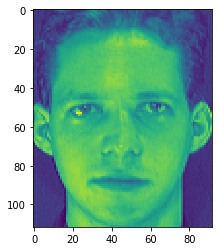

In [37]:
plt.imshow(dataframe['Image'][0])
plt.show()


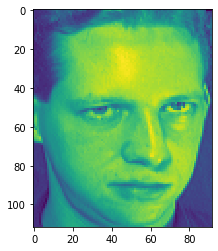

In [38]:
plt.imshow(dataframe['Image'][1])
plt.show()

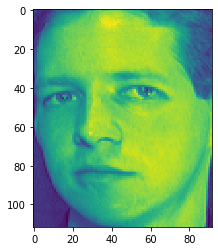

In [39]:
plt.imshow(dataframe['Image'][4])
plt.show()

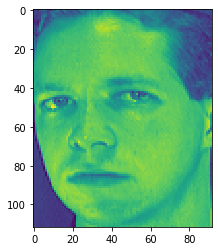

In [40]:
plt.imshow(dataframe['Image'][6])
plt.show()

In [41]:
dataframe['Label'][1]

1

In [42]:
print(len(dataframe))


400


In [43]:
print(dataframe['Image'][1].shape)

(112, 92)


<code>We can see that total of 400 images are loaded from our 10 folders</code>

<code>images are grayscale and 92 x 112 pixels in dimension</code>

<code>Even though images are small their feature vector will have 10304 dimensions. We need to Use PCA to represent the same images in a compact way using principal components </code>



<code>But before that, we need to reshape the matrix of pixel intensities for an image into a vector and create a matrix of these vectors for all the training images</code>

### Reshaping the matrix of pixel intensities for an image into a vector and create a matrix of these vectors for all the training images

In [44]:
imagesCount=len(dataframe['Image'])
for i in range(imagesCount):
    pic = dataframe['Image'][i]
    print(pic.shape)
    dataframe['Image'][i] = pic.reshape(pic.shape[0]*pic.shape[1])

(112, 92)
(112, 92)
(112, 92)


c:\users\rjmha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)
(112, 92)


In [45]:
dataframe['Image'][1].shape

(10304,)

<code>We can see that each image of shape (112, 92) is transformed into a feature vector of 10304 dimensions</code>

In [46]:
dataframe['Image'][1]

array([0.13333333, 0.13333333, 0.12941176, ..., 0.14509804, 0.15686275,
       0.12941176])

In [47]:
train_pic=[]


In [48]:
test_pic=[]
train_lbl=[]
test_lbl=[]

In [49]:
muls=[10*i for i in range(1,41) ]
for i in range(0,400):
    if(i>0  and (i+1 in  muls)):
        test_pic.append(dataframe['Image'][i])
        test_lbl.append(dataframe['Label'][i])
    else:
        train_pic.append(dataframe['Image'][i])
        train_lbl.append(dataframe['Label'][i])

In [50]:
train_pic_vectors = []
for i in train_pic:
    train_pic_vectors.append(i.tolist())
test_pic_vectors = []
for j in test_pic:
    test_pic_vectors.append(j.tolist())

In [51]:
for i in range(360):
    for j in range(10304):
        train_pic_vectors[i][j]=np.asscalar(np.asarray(train_pic_vectors[i][j]))
for i in range(40):
    for j in range(10304):
        test_pic_vectors[i][j]=np.asscalar(np.asarray(test_pic_vectors[i][j]))

In [52]:
imagesMatrix = np.matrix(train_pic_vectors)

## Fitting PCA on train_pic data such that 95% of the variance is retained

In [53]:
from sklearn import decomposition
pca = decomposition.PCA(.95)
pca.fit(imagesMatrix)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.n_components_

176

<code>Out of 10304 dimensions for an image, 176 dimensions cover 95% of variance, so we can project all the other dimensions into 176D space</code>

In [55]:
train_pic = pca.transform(np.asmatrix(train_pic_vectors,dtype='float64'))
test_pic = pca.transform(np.asmatrix(test_pic_vectors,dtype='float64'))

In [56]:
train_pic.shape,test_pic.shape

((360, 176), (40, 176))

In [57]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
logisticRegr.fit(train_pic, train_lbl)


c:\users\rjmha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
test_lbl[:]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [59]:
logisticRegr.predict(test_pic[:])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39,  5], dtype=int64)

### Finding Accuracy for checking model performance



In [60]:
logisticRegr.score(test_pic[:], test_lbl)

0.95

## Logistic Regression for Multi-class or Multinomial Classification

### Building Model - followed by Cross Validation for  Hyper Tuning

<p> Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. ... In k-fold cross-validation, you split the input data into k subsets of data (also known as folds). In sklearn, we have different Kfold CV techniques available.<br>
<code><b>StratifiedKFold</b>
The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation
<b>GroupKFold</b>
K-fold iterator variant with non-overlapping groups.
<b>RepeatedKFold</b>
Repeats K-Fold n times</code>
</p>

#### Method1 : Using cross_validate, we can get any no. of metrics after cross validation

#### Building Model - one-versus-all classifier

In [65]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

In [66]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='micro'),
           'recall' : make_scorer(recall_score,average='micro'), 
           'f1_score' : make_scorer(f1_score,average='micro')}


#skf=model_selection.KFold(n_splits=10, random_state=42)
pic_vectors = np.matrix(dataframe['Image']) 
#lbl = np.matrix(dataframe['Label'].values.tolist()) 
lbl = np.matrix(dataframe['Label']) 


model = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(train_pic,train_lbl)
# scores = cross_val_score(model, train_pic, train_lbl, cv=skf)
# print ("Cross-validated scores:", scores)


In [67]:
skf=StratifiedKFold(n_splits=9, random_state=0)
results = cross_validate(estimator=model,
                                          X=train_pic,
                                          y=train_lbl,
                                          cv=skf,
                                          scoring=scoring)
CVResultsdf=pd.DataFrame.from_dict(results)
CVResultsdf

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,1.202797,0.004991,0.975,0.975,0.975,0.975
1,1.265518,0.008000,0.975,0.975,0.975,0.975
2,1.196108,0.005179,1.000,1.000,1.000,1.000
3,1.265513,0.005177,1.000,1.000,1.000,1.000
4,1.232013,0.016821,1.000,1.000,1.000,1.000
5,1.237645,0.004065,1.000,1.000,1.000,1.000
6,1.211725,0.007517,0.975,0.975,0.975,0.975
7,1.219936,0.005531,0.950,0.950,0.950,0.950
8,1.126226,0.004889,0.950,0.950,0.950,0.950


### average per-class F1 score, recall and precision of the trained classifier

In [68]:
Avg_Precision = CVResultsdf.test_precision.mean()
Avg_Recall = CVResultsdf.test_recall.mean()
Avg_F1Score = CVResultsdf.test_f1_score.mean()
print ("Avg_Precision = {} ,Avg_Recall = {} ,Avg_F1Score = {}".format(Avg_Precision,Avg_Recall,Avg_F1Score))

Avg_Precision = 0.9805555555555555 ,Avg_Recall = 0.9805555555555555 ,Avg_F1Score = 0.9805555555555555


### Avg_Precision = 0.9833333333333333 ,Avg_Recall = 0.9833333333333333 ,Avg_F1Score = 0.9833333333333333

#### Method2 : Using cross_val_score, we can only get one metric, here, I am using F1_Score

In [75]:
from sklearn.model_selection import  cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


model = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(train_pic,train_lbl)
models = [model]
names = ["Logistic Regression"]

def gettingTheScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, average='micro'), 
            recall_score(y, yPred, average='micro'),
           f1_score(y, yPred, average='micro'))

def myactualscorer(estimator, x, y):
    a, p, r ,f1 = gettingTheScores(estimator, x, y)
    return f1

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}    
    
for model, name in zip(models, names):
    print (name)
    start = time.time()
    cv_score = cross_val_score(model, train_pic, train_lbl,scoring=myactualscorer, cv=9)
    print(cv_score)
    Avg_F1Score = cv_score.mean()
    print ('\nAvg_F1Score:',Avg_F1Score, '\n\n')

Logistic Regression
[0.975 0.975 1.    1.    1.    1.    0.975 0.95  0.95 ]

Avg_F1Score: 0.9805555555555555 




#### We can see that Avg_F1Score from both methods are same and note that here, we are using Micro Average

<code>Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).</code>



In [76]:
from sklearn.metrics import classification_report


In [77]:
test_lbl

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [78]:
y_pred=[]
i=1
for pic in test_pic:
    a=model.predict(pic.reshape(1,-1))
    #print(test_lbl.iloc[i],a)
    y_pred.append(a)
    i+=1
print(test_lbl,"--------", y_pred)
print(classification_report(test_lbl, y_pred))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] -------- [array([1], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([6], dtype=int64), array([7], dtype=int64), array([8], dtype=int64), array([9], dtype=int64), array([10], dtype=int64), array([11], dtype=int64), array([12], dtype=int64), array([13], dtype=int64), array([14], dtype=int64), array([15], dtype=int64), array([16], dtype=int64), array([17], dtype=int64), array([18], dtype=int64), array([11], dtype=int64), array([20], dtype=int64), array([21], dtype=int64), array([22], dtype=int64), array([23], dtype=int64), array([24], dtype=int64), array([25], dtype=int64), array([26], dtype=int64), array([27], dtype=int64), array([28], dtype=int64), array([29], dtype=int64), array([30], dtype=int64), array([31], dtype=int64), array([32], dtype=int64), array([33], dty

c:\users\rjmha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


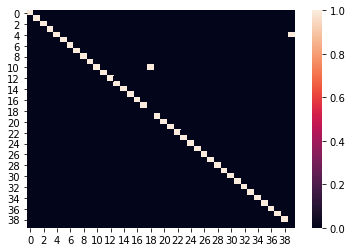

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
results = confusion_matrix(y_pred,test_lbl)

ax = sns.heatmap(results)
plt.show()